# Statistiques descriptives

**Table des matières:**

- I. Notions préliminaires
    - [a. Vocabulaire](#vocabulaire)
    - [b. Application de ces concepts](#appliconcepts)
    
     
- II. Types de variables et représentations
    - [a. Types de variables](#typesdevariables)
    - [b. Variables catégorielles : représentations](#s3_3)
    - [c. Variables numériques : représentations](#s3_4)
     


<span style='color:red'>TODO</span>

- III. Variables quantitatives : mesures de centralité, de dispersion et d'asymétrie

- IV. Implémentation en `pandas`


## I. Notions préliminaires


### a. Vocabulaire
<a id='vocabulaire'></a>


* **Population**
    - Ensemble des individus ou des objets d'intérêt
* **Echantillon**
    - Seulement une partie de la population d'intérêt
* **Echantillon aléatoire**
    -  Seulement une partie de la population d'intérêt, dont les individus ont été choisis au hasard
* **Echantillon représentatif**
    -  Seulement une partie de la population d'intérêt, qui la représente fidèlement
* **Paramètre**
    - Une valeur qui concerne une population
* **Statistique**
    - Une valeur qui concerne un échantillon

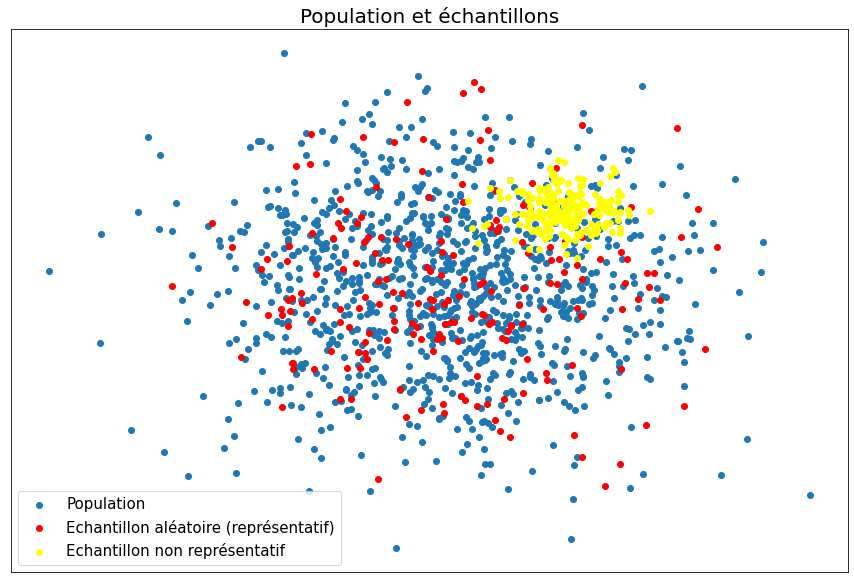

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,10))

_ = np.random.normal(0,1,1000)
__ = np.random.normal(0,1,1000) * 5 + 1
plt.scatter(_, __, label="Population")

_ = np.random.normal(0,1,200)
__ = np.random.normal(0,1,200) * 5 + 1
plt.scatter(_, __, color="red", label="Echantillon aléatoire (représentatif)")

_ = np.random.normal(1,1/4,200)
__ = np.random.normal(1,1/4,200) * 5 + 1
plt.scatter(_, __, color="yellow", label="Echantillon non représentatif")

# for minor ticks
#ax.set_xticks([], minor=True)


# for minor ticks
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.legend(fontsize=15)

plt.title("Population et échantillons", fontsize=20)

plt.show()

### b. Application de ces concepts
<a id='appliconcepts'></a>

* Dans l'immense majorité des cas, on travaille avec les données d'un échantillon et pas de la population complète
* Dans ce cas, on travaille par "inférence statistique" : on induit des caractéristiques sur un groupe général (la population), à partir d'informaton sur un groupe particulier (l'échantillon). On s'intéresse également à l'erreur que l'on peut commettre entre la vraie valeur (le paramètre de l'échantillon) et la valeur obtenue à partir de l'échantillon (la statistique)
* Attention, un échantillon aléatoire, n'est pas toujours représentatif
    

## II. Types de variables et représentations 

### a. **Types de variables**

<a id='typesdevariables'></a>

* **Variable catégorielle ou qualitative**
   - Une variable qui est une catégorie : la couleur des yeux pour un humain, la marque pour une voiture...
   - Les différentes valeurs possibles sont appelées les modalités
    -  **Nominale** : 
        - Ne dépend pas d'un ordre, par exemple la couleur des yeux
    -  **Ordinale** : 
        - Les valeurs peuvent être ordonnées, par exemple : mauvais / moyen / bien / très bien


* **Variable numérique ou quantitative**
    - Une variable qui est une valeur, un nombre. Peut être continue ou discrète
     - **Variable discrète**
        - On peut énumérer toutes les valeurs possibles : le nombre de personnes dans une salle, le nombre d'années d'études
     - **Variable continue**
        - Peut prendre n'importe quelle valeur entre deux bornes : la taille d'un humain, la vitesse du vent



#### **Un exemple : le dataset "diamonds"**
- Documentation du dataset : https://www2.stat.duke.edu/courses/Fall15/sta112.01/post/hw/HW1.html

- Quelques lignes au hasard : 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>carat</th>
      <th>cut</th>
      <th>color</th>
      <th>price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>38747</th>
      <td>0.35</td>
      <td>Ideal</td>
      <td>G</td>
      <td>1044</td>
    </tr>
    <tr>
      <th>37591</th>
      <td>0.24</td>
      <td>Very Good</td>
      <td>E</td>
      <td>485</td>
    </tr>
    <tr>
      <th>38560</th>
      <td>0.50</td>
      <td>Fair</td>
      <td>G</td>
      <td>1035</td>
    </tr>
    <tr>
      <th>49076</th>
      <td>0.54</td>
      <td>Ideal</td>
      <td>G</td>
      <td>2060</td>
    </tr>
    <tr>
      <th>4753</th>
      <td>1.21</td>
      <td>Ideal</td>
      <td>I</td>
      <td>3686</td>
    </tr>
    <tr>
      <th>44483</th>
      <td>0.60</td>
      <td>Very Good</td>
      <td>H</td>
      <td>1597</td>
    </tr>
    <tr>
      <th>11527</th>
      <td>1.07</td>
      <td>Ideal</td>
      <td>F</td>
      <td>5027</td>
    </tr>
    <tr>
      <th>26489</th>
      <td>1.70</td>
      <td>Very Good</td>
      <td>G</td>
      <td>16086</td>
    </tr>
    <tr>
      <th>51427</th>
      <td>0.77</td>
      <td>Good</td>
      <td>G</td>
      <td>2373</td>
    </tr>
    <tr>
      <th>23687</th>
      <td>1.51</td>
      <td>Good</td>
      <td>G</td>
      <td>11746</td>
    </tr>
  </tbody>
</table>


- carat et price : 
    - variables quantitatives continues
- cut : 
    - variable qualitative ordinale ('Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal')
- color :
    - peut être vue comme nominale ou ordinale (couleurs différentes, mais bien ordonnées d'après la documentation dans le cas précis des diamants)        

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('seaborn-paper')

df = pd.read_csv('../data/cars/mtcars.csv')
diamonds = pd.read_csv('../data/diamonds/diamonds.csv').drop("Unnamed: 0", axis=1)

#print(diamonds[["carat", "cut", "color", "price"]].sample(10).to_html())

### b. **Variables catégorielles : représentations**
<a id='s3_3'></a>

- On représente généralement :
    * **Effectifs** : Nombres d'occurences des modalités
    * **Fréquences** : Nombres d'occurences des modalités divisés par l'effectif total


#### **Table des effectifs**

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>cut</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Fair</th>
      <td>1610</td>
    </tr>
    <tr>
      <th>Good</th>
      <td>4906</td>
    </tr>
    <tr>
      <th>Very Good</th>
      <td>12082</td>
    </tr>
    <tr>
      <th>Premium</th>
      <td>13791</td>
    </tr>
    <tr>
      <th>Ideal</th>
      <td>21551</td>
    </tr>
  </tbody>
</table>

In [4]:
# print(pd.DataFrame(diamonds['cut'].value_counts(ascending=True)).to_html())

#### **Table des fréquences**

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>cut</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Ideal</th>
      <td>39.95%</td>
    </tr>
    <tr>
      <th>Premium</th>
      <td>25.57%</td>
    </tr>
    <tr>
      <th>Very Good</th>
      <td>22.40%</td>
    </tr>
    <tr>
      <th>Good</th>
      <td>9.10%</td>
    </tr>
    <tr>
      <th>Fair</th>
      <td>2.98%</td>
    </tr>
  </tbody>
</table>

In [5]:
# print(pd.DataFrame(pd.DataFrame(diamonds['cut'].value_counts(ascending=False, normalize=True).map(lambda x: '{:.2%}'.format(x)))).to_html())

#### **Diagramme en batons (Bar Chart)**

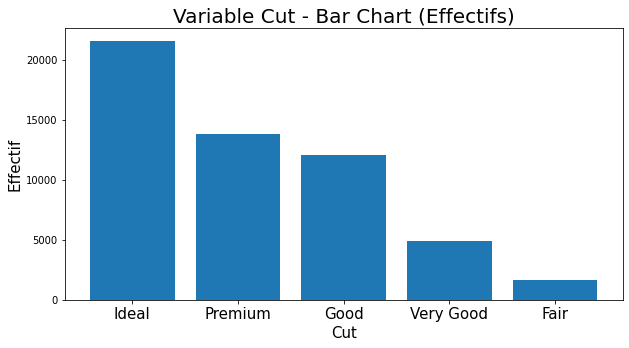

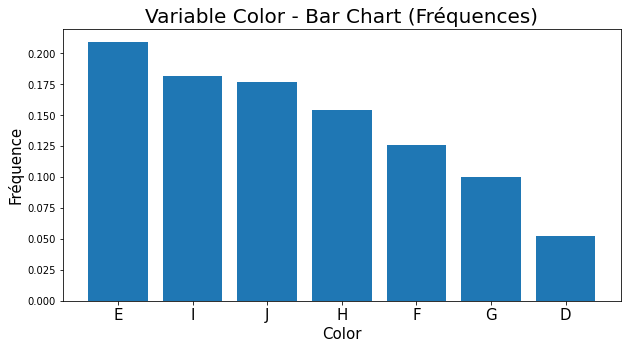

In [6]:
plt.figure(figsize=(10,5))
y_pos = np.arange(len(diamonds['cut'].unique()))
plt.bar(y_pos, diamonds['cut'].value_counts(), align = 'center')
plt.xticks(y_pos, diamonds['cut'].unique(), fontsize=15)
plt.xlabel('Cut', fontsize=15)
plt.ylabel('Effectif', fontsize=15)
plt.title('Variable Cut - Bar Chart (Effectifs)', fontsize=20)

plt.show()

plt.figure(figsize=(10,5))
y_pos = np.arange(len(diamonds['color'].unique()))
plt.bar(y_pos, diamonds['color'].value_counts(normalize=True), align = 'center')
plt.xticks(y_pos, diamonds['color'].unique(), fontsize=15)
plt.xlabel('Color', fontsize=15)
plt.ylabel('Fréquence', fontsize=15)
plt.title('Variable Color - Bar Chart (Fréquences)', fontsize=20)

plt.show()

#### **Diagramme circulaire / Camembert (Pie Chart)**

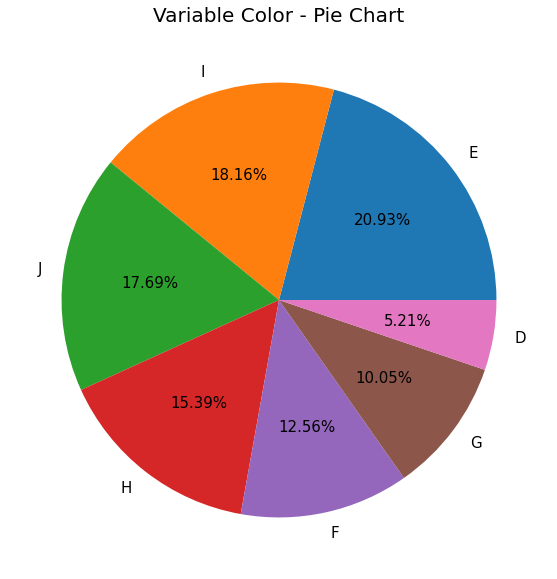

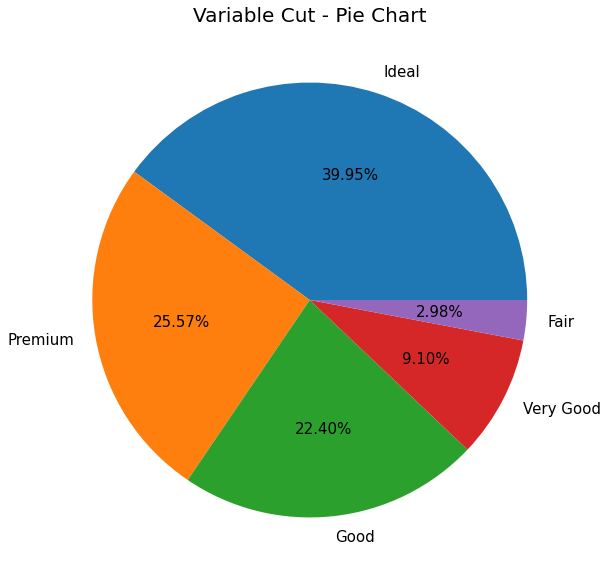

In [7]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 15

plt.figure(figsize=(10,10))
plt.pie(diamonds['color'].value_counts(), labels = diamonds['color'].unique(), autopct='%1.2f%%')
plt.title('Variable Color - Pie Chart', fontsize=20)
plt.show()

plt.figure(figsize=(10,10))
plt.pie(diamonds['cut'].value_counts(), labels = diamonds['cut'].unique(), autopct='%1.2f%%')
plt.title('Variable Cut - Pie Chart', fontsize=20)
plt.show()

#### **Diagramme de Pareto**

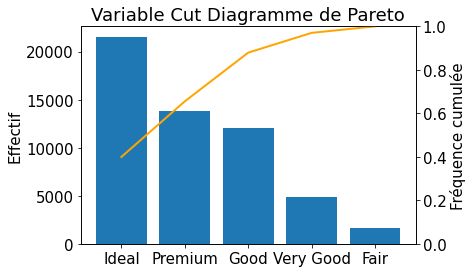

In [14]:
values = diamonds['cut'].value_counts()
labels = np.arange(len(diamonds['cut'].unique()))

yvalues = []
xvalues = range(len(diamonds['cut'].unique()))

tmp = 0
for x in diamonds['cut'].value_counts():
    tmp += x/len(diamonds)
    yvalues.append(tmp)
    
    
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
    
ax1.bar(labels, values, align = 'center')
ax1.set_ylabel('Effectif')
ax2.plot(xvalues, yvalues, color = 'orange', linewidth = 2, linestyle = '-')
ax2.set_ylim(0,1)
ax2.set_ylabel('Fréquence cumulée')
plt.xticks(labels, diamonds['cut'].unique())
plt.title('Variable Cut Diagramme de Pareto')

plt.show()

#### **Table de contingence (effectifs)**

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>cut</th>
      <th>Fair</th>
      <th>Good</th>
      <th>Ideal</th>
      <th>Premium</th>
      <th>Very Good</th>
      <th>All</th>
    </tr>
    <tr>
      <th>color</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>D</th>
      <td>163</td>
      <td>662</td>
      <td>2834</td>
      <td>1603</td>
      <td>1513</td>
      <td>6775</td>
    </tr>
    <tr>
      <th>E</th>
      <td>224</td>
      <td>933</td>
      <td>3903</td>
      <td>2337</td>
      <td>2400</td>
      <td>9797</td>
    </tr>
    <tr>
      <th>F</th>
      <td>312</td>
      <td>909</td>
      <td>3826</td>
      <td>2331</td>
      <td>2164</td>
      <td>9542</td>
    </tr>
    <tr>
      <th>G</th>
      <td>314</td>
      <td>871</td>
      <td>4884</td>
      <td>2924</td>
      <td>2299</td>
      <td>11292</td>
    </tr>
    <tr>
      <th>H</th>
      <td>303</td>
      <td>702</td>
      <td>3115</td>
      <td>2360</td>
      <td>1824</td>
      <td>8304</td>
    </tr>
    <tr>
      <th>I</th>
      <td>175</td>
      <td>522</td>
      <td>2093</td>
      <td>1428</td>
      <td>1204</td>
      <td>5422</td>
    </tr>
    <tr>
      <th>J</th>
      <td>119</td>
      <td>307</td>
      <td>896</td>
      <td>808</td>
      <td>678</td>
      <td>2808</td>
    </tr>
    <tr>
      <th>All</th>
      <td>1610</td>
      <td>4906</td>
      <td>21551</td>
      <td>13791</td>
      <td>12082</td>
      <td>53940</td>
    </tr>
  </tbody>
</table>

In [17]:
# print(pd.crosstab(diamonds['color'], diamonds['cut'], margins = True).to_html())

#### **Table de contingence (fréquences)**

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>cut</th>
      <th>Fair</th>
      <th>Good</th>
      <th>Ideal</th>
      <th>Premium</th>
      <th>Very Good</th>
      <th>All</th>
    </tr>
    <tr>
      <th>color</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>D</th>
      <td>0.30%</td>
      <td>1.23%</td>
      <td>5.25%</td>
      <td>2.97%</td>
      <td>2.80%</td>
      <td>12.56%</td>
    </tr>
    <tr>
      <th>E</th>
      <td>0.42%</td>
      <td>1.73%</td>
      <td>7.24%</td>
      <td>4.33%</td>
      <td>4.45%</td>
      <td>18.16%</td>
    </tr>
    <tr>
      <th>F</th>
      <td>0.58%</td>
      <td>1.69%</td>
      <td>7.09%</td>
      <td>4.32%</td>
      <td>4.01%</td>
      <td>17.69%</td>
    </tr>
    <tr>
      <th>G</th>
      <td>0.58%</td>
      <td>1.61%</td>
      <td>9.05%</td>
      <td>5.42%</td>
      <td>4.26%</td>
      <td>20.93%</td>
    </tr>
    <tr>
      <th>H</th>
      <td>0.56%</td>
      <td>1.30%</td>
      <td>5.77%</td>
      <td>4.38%</td>
      <td>3.38%</td>
      <td>15.39%</td>
    </tr>
    <tr>
      <th>I</th>
      <td>0.32%</td>
      <td>0.97%</td>
      <td>3.88%</td>
      <td>2.65%</td>
      <td>2.23%</td>
      <td>10.05%</td>
    </tr>
    <tr>
      <th>J</th>
      <td>0.22%</td>
      <td>0.57%</td>
      <td>1.66%</td>
      <td>1.50%</td>
      <td>1.26%</td>
      <td>5.21%</td>
    </tr>
    <tr>
      <th>All</th>
      <td>2.98%</td>
      <td>9.10%</td>
      <td>39.95%</td>
      <td>25.57%</td>
      <td>22.40%</td>
      <td>100.00%</td>
    </tr>
  </tbody>
</table>

In [18]:
# print(pd.crosstab(diamonds['color'], diamonds['cut'], margins = True, normalize=True).applymap(lambda x: '{:.2%}'.format(x)).to_html())

###  c. **Variables numériques : représentations**
<a id='s3_4'></a>


#### **Histogrammes**

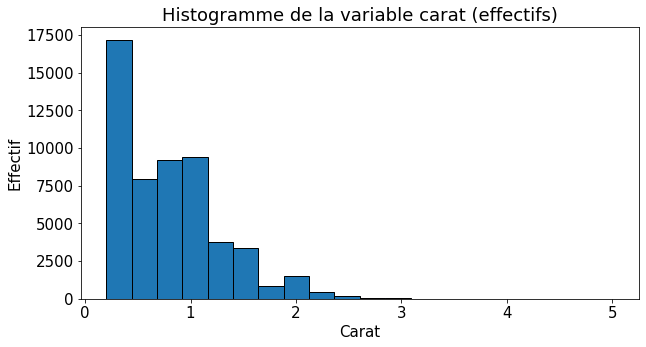

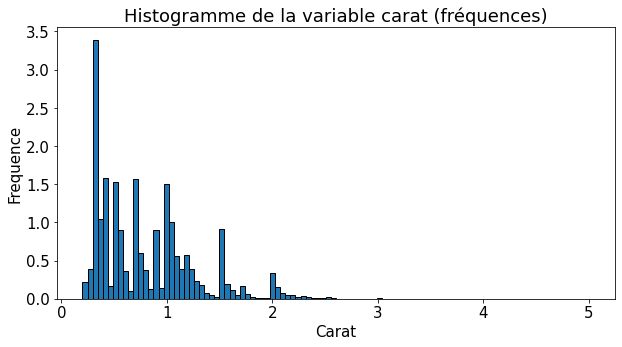

In [23]:
plt.figure(figsize=(10,5))
plt.hist(diamonds['carat'], bins = 20,  edgecolor="black")
plt.xlabel('Carat')
plt.ylabel('Effectif')
plt.title('Histogramme de la variable carat (effectifs)')
plt.show()


plt.figure(figsize=(10,5))
plt.hist(diamonds['carat'], bins = 100, density=True, edgecolor="black")
plt.xlabel('Carat')
plt.ylabel('Frequence')
plt.title('Histogramme de la variable carat (fréquences)')
plt.show()

#### **Nuages de points (Scatter plot)**

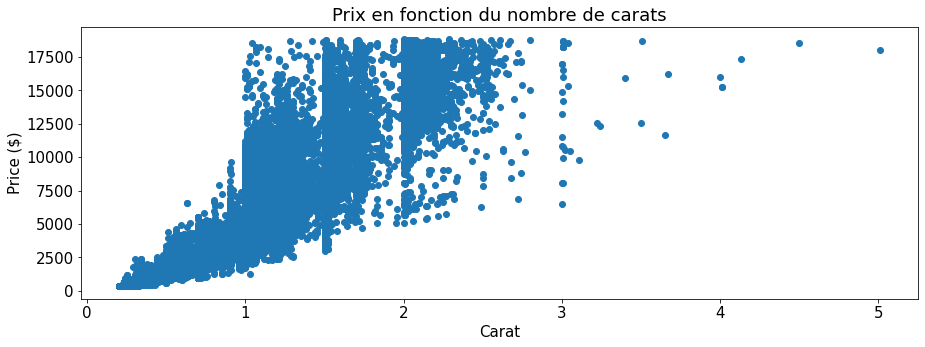

In [24]:
plt.figure(figsize=(15,5))
plt.xlabel("Carat")
plt.ylabel("Price ($)")
plt.title("Prix en fonction du nombre de carats")
plt.scatter(diamonds.carat, diamonds.price)
plt.show()